In [1]:
import pandas as pd
from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet
df = pd.read_csv("comentarios.csv")

def limpiar_comentario(comentario):
    return preprocess_tweet(comentario, lang="es")

df['post_limpio'] = df['post'].apply(limpiar_comentario)

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [3]:
def detectar_discurso_odio(comentario):
    resultado = hate_speech_analyzer.predict(comentario)
    discurso_odio = resultado.output
    probabilidad = max(resultado.probas.values())  # Obtener la probabilidad más alta entre todas las categorías
    return discurso_odio, probabilidad

In [4]:
df[['discurso_odio', 'probabilidad_discurso_odio']] = df['post_limpio'].apply(detectar_discurso_odio).apply(pd.Series)


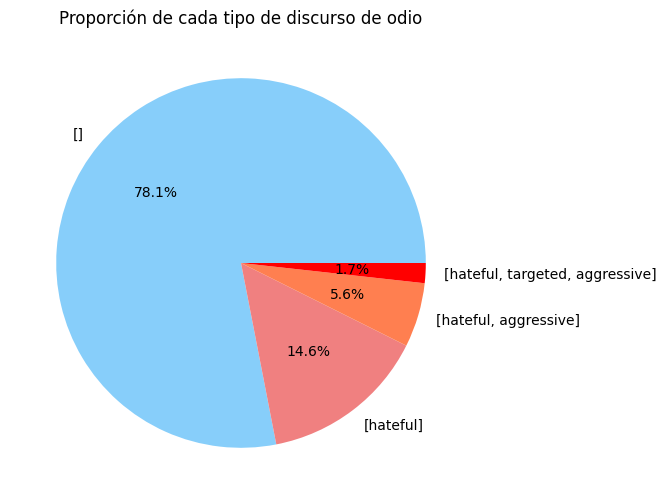

In [7]:
import matplotlib.pyplot as plt

# Obtener la proporción de cada tipo de discurso de odio
proporciones_discurso_odio = df['discurso_odio'].value_counts(normalize=True)

# Graficar un gráfico de pastel de la proporción de cada tipo de discurso de odio
plt.figure(figsize=(6, 6))
proporciones_discurso_odio.plot(kind='pie', autopct='%1.1f%%', colors=['lightskyblue', 'lightcoral', 'coral', 'red'])
plt.title('Proporción de cada tipo de discurso de odio')
plt.ylabel('')
plt.show()